In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [79]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [80]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [81]:
print(df['rank'].value_counts(),'\n')
print(df['sex'].value_counts(),'\n')
print(df['discipline'].value_counts(),'\n')

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64 

Male      358
Female     39
Name: sex, dtype: int64 

B    216
A    181
Name: discipline, dtype: int64 



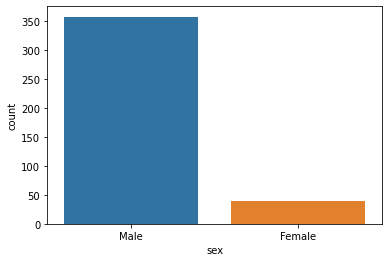

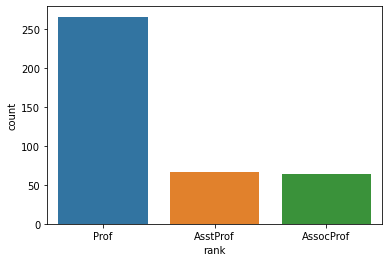

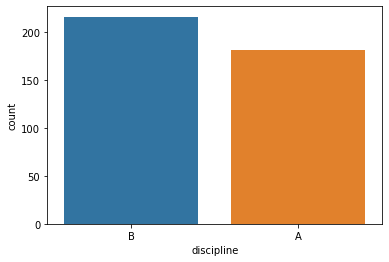

In [82]:
sns.countplot(df['sex'])
plt.show()

sns.countplot(df['rank'])
plt.show()

sns.countplot(df['discipline'])
plt.show()

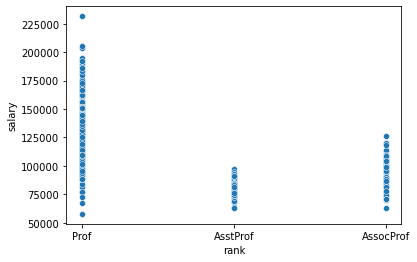

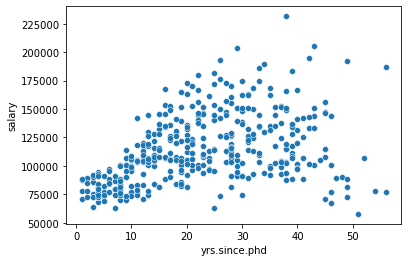

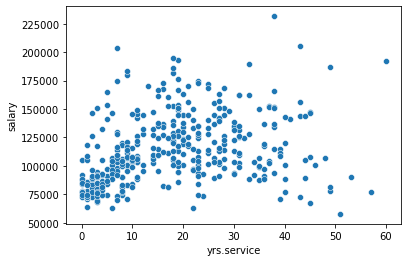

In [83]:
sns.scatterplot(x = df['rank'], y = df['salary'], data=df)
plt.show()

sns.scatterplot(x = df['yrs.since.phd'], y = df['salary'], data=df)
plt.show()

sns.scatterplot(x = df['yrs.service'], y = df['salary'], data=df)
plt.show()

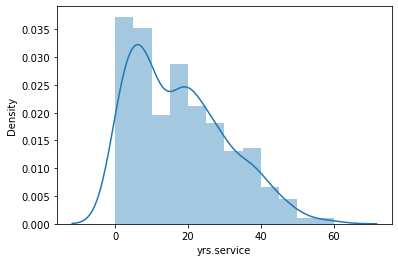

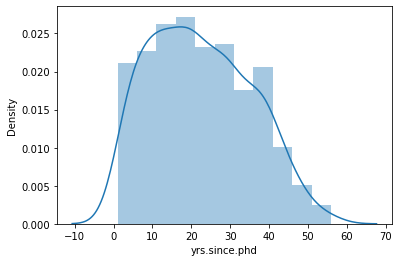

In [84]:
sns.distplot(x = df['yrs.service'])
plt.xlabel('yrs.service')
plt.show()

sns.distplot(x = df['yrs.since.phd'])
plt.xlabel('yrs.since.phd')
plt.show()

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))
        
print(df['rank'].value_counts(),'\n')
print(df['sex'].value_counts(),'\n')
print(df['discipline'].value_counts(),'\n')

In [85]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [86]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

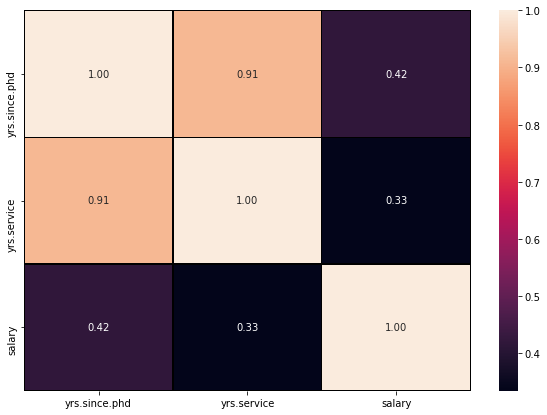

In [87]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')

We observe there is strong correlation b/w yrs.service & yrs.since.phd

Target salaries has +ve correlation of 0.52 & 0.42 with rank & yrs.since.phd respectively

yrs.since.phd       AxesSubplot(0.125,0.536818;0.227941x0.343182)
yrs.service      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
salary           AxesSubplot(0.672059,0.536818;0.227941x0.343182)
dtype: object

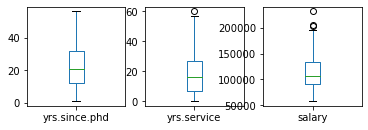

In [88]:
df.plot(kind='box',subplots=True,layout=(2,3))

In [89]:
df = pd.get_dummies(df)

df.head()

,yrs.since.phd,yrs.service,salary,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
0,19,18,139750,0,0,1,0,1,0,1
1,20,16,173200,0,0,1,0,1,0,1
2,4,3,79750,0,1,0,0,1,0,1
3,45,39,115000,0,0,1,0,1,0,1
4,40,41,141500,0,0,1,0,1,0,1


In [90]:
print(df.shape)

from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print(df_new.shape)

(397, 10)
(354, 10)


In [91]:
float((397-354)/397)*100

10.831234256926953

In [92]:
df_new.skew()

yrs.since.phd     0.234156
yrs.service       0.529464
salary            0.584912
rank_AssocProf    1.940993
rank_AsstProf     1.881306
rank_Prof        -0.821410
discipline_A      0.182308
discipline_B     -0.182308
sex_Female        0.000000
sex_Male          0.000000
dtype: float64

In [93]:
x = df_new.drop(['salary'],axis=1)
y = df_new['salary']

In [94]:
print(x.shape, y.shape)

(354, 9) (354,)


In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [97]:
lr.fit(x_train,y_train)
pred_y_train = lr.predict(x_train)
pred_y_test = lr.predict(x_test)
lr.score(x_train,y_train)

0.4615372378594298

In [98]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
ls = Lasso(alpha=0.01)
rd = Ridge(alpha=0.01)
en = ElasticNet(alpha=0.01)

ls.fit(x_train,y_train)
print("LS SCORE = ",ls.score(x_train,y_train))

rd.fit(x_train,y_train)
print("\nRD SCORE = ",rd.score(x_train,y_train))

en.fit(x_train,y_train)
print("\nEN SCORE = ",en.score(x_train,y_train))

LS SCORE =  0.4615372378569199

RD SCORE =  0.4615372340035959

EN SCORE =  0.4614833706557401


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10], 'random_state':list(range(0,50))}
ls=Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [100]:
ls = Lasso(alpha=10, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

pred_ls = ls.predict(x_test)

In [101]:
import pickle
filename='salary.pkl'
pickle.dump(ls,open(filename,'wb'))